In [39]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.20.13-1ubuntu1~20.04.6).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [40]:
### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk
!pip install svgling

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.50~dfsg-5ubuntu4.6).
python3-tk is already the newest version (3.8.10-0ubuntu1~20.04).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
%matplotlib inline
import matplotlib
matplotlib.use('Agg')

In [42]:
import nltk
from nltk.tokenize import word_tokenize

In [43]:
grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
parser = nltk.ChartParser(grammar)

sentence = word_tokenize("I shot an elephant in my pajamas")
for tree in parser.parse(sentence):
  print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


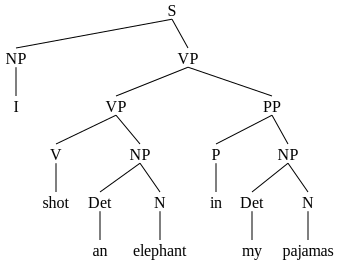

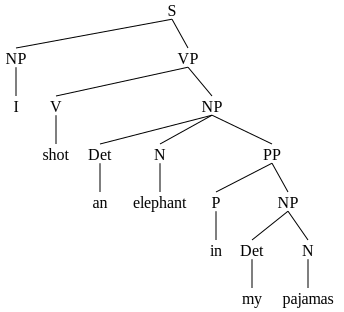

In [46]:
for tree in parser.parse(sentence):
  display(tree)

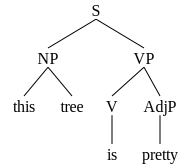

In [47]:
from nltk.tree import Tree
from IPython.display import display
chunked_sentence = '(S (NP this tree) (VP (V is) (AdjP pretty)))'

tree = Tree.fromstring(str(chunked_sentence))
display(tree)

In [48]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
text = word_tokenize("And now for something completely different")
result = nltk.pos_tag(text)
result

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [50]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

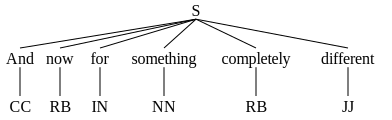

In [51]:
nltk.ne_chunk(result)

In [52]:
import spacy
from spacy import displacy
 
sp = spacy.load('en_core_web_sm')
sentence = sp(u"We are eating at a restaurant with our friends.")
displacy.render(sentence, style='dep', jupyter=True, options={'distance': 75})


In [53]:
raw_text = "Madrid is the capital and most populous city of Spain. The city has almost 3.4 million inhabitants and a metropolitan area population of approximately 6.7 million. It is the second-largest city in the European Union (EU), surpassed only by Berlin in its administrative limits, and its monocentric metropolitan area is the second-largest in the EU, surpassed only by Paris. The municipality covers 604.3 km2 (233.3 sq mi) geographical area."

In [54]:
NER = spacy.load("en_core_web_sm", disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"])

text= NER(raw_text)

spacy.displacy.render(text, style="ent",jupyter=True)


In [55]:
import spacy
import pandas as pd
nlp = spacy.load('en_core_web_sm')

GPEdoc = nlp("""Madrid is the capital of Spain. The covid pandemic started in 2019.""")

print(GPEdoc.ents[0], GPEdoc.ents[0].label_)
GPEdoc.ents


Madrid GPE


(Madrid, Spain, 2019)

In [56]:
GPEdoc.ents

(Madrid, Spain, 2019)

In [57]:
entities_sp = pd.DataFrame([(ent, ent.label_) for ent in GPEdoc.ents],columns=["entity","label"])
entities_sp

,entity,label
0,(Madrid),GPE
1,(Spain),GPE
2,(2019),DATE


In [ ]:
!pip install polyglot pyicu pycld2 morfessor

In [ ]:
!polyglot download embeddings2.es ner2.es

Polyglot

In [ ]:

from polyglot.downloader import downloader
print(downloader.supported_languages_table("ner2", 3))

In [ ]:
from polyglot.text import Text

textp= Text("""Madrid está en España. 
            En febrero de 2019 empezó la pandemia""")
textp.entities


In [ ]:
import pandas as pd
pd.DataFrame([(ent[0],ent.tag) for ent in textp.entities],columns=["entity","label"])

In [ ]:
for sent in textp.sentences:
  print(sent, "\n")
  for entity in sent.entities:
    print(entity.tag, entity)

# Open information extraction
https://corenlp.run/

# Text similarity

In [ ]:
# Import the cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
# Define two 3-dimensional vectors A and B
A = (2,3,1)
B = (5,2,3)
# Compute the cosine score of A and B
score = cosine_similarity([A], [B])
# Print the cosine score
print(score)


In [ ]:
# Import the cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.metrics import jaccard_score
import numpy as np
import pandas as pd
np.random.seed(0)
df = pd.DataFrame(np.random.binomial(1, 0.5, size=(100, 5)), columns=list('ABCDE'))
print(jaccard_score(df['A'], df['B']))

In [ ]:
df